In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import itertools

In [3]:
def get_FE_profile(filename, ref_vol, fillna_bool=False):
    df = pd.read_csv(filename, sep='\s+')
    if fillna_bool:
        df = df.fillna(40000)
    else:
        df = df.dropna()
    #df = df.fillna(0)
    df = df.reset_index()
    df['Pressure'] *= 101325
    closest_to_zero = (df['Volume'] - ref_vol).apply(abs)
    rel_id = closest_to_zero.argmin()
    df['Volume'] *= (1e-10)**3

    free_eng_list = [0]
    for i in range(1,len(df['Pressure'])):
        free_eng_list.append(-integrate.trapz(df['Pressure'].array[:i], x=df['Volume'].array[:i]))
        
    free_eng = np.array(free_eng_list)
    free_eng *= 6.022e23 / 1000
    #free_eng -= min(free_eng)
    free_eng -= free_eng[rel_id]

    return df.copy(), free_eng

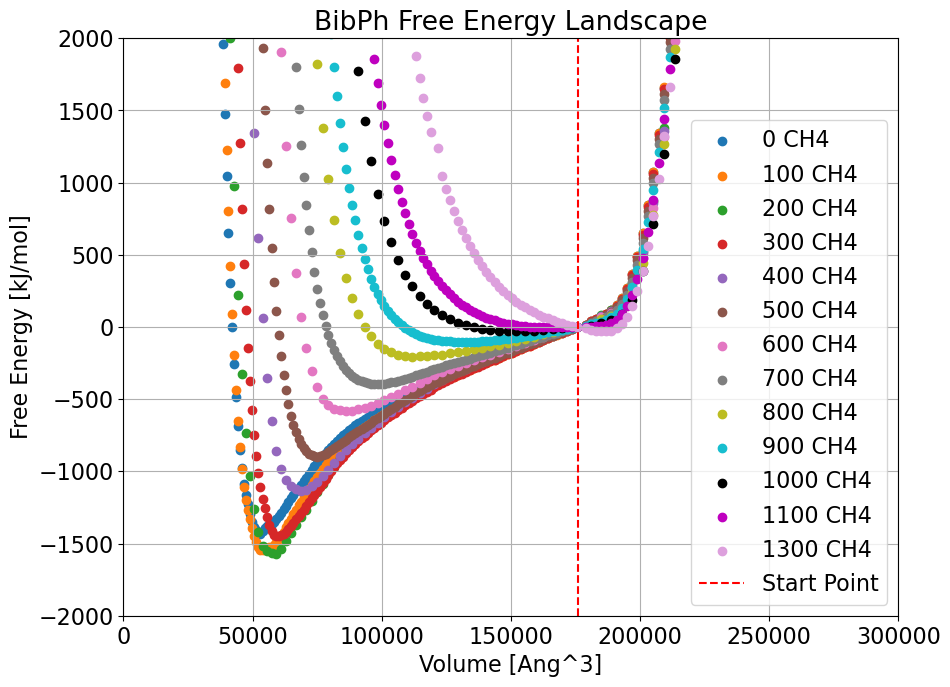

In [4]:
df_0, free_eng_0 = get_FE_profile('pressures_bibPh_0mol.txt', 175000)
df_100, free_eng_100 = get_FE_profile('pressures_bibPh_100mol.txt', 175000)
df_200, free_eng_200 = get_FE_profile('pressures_bibPh_200mol.txt', 175000)
df_300, free_eng_300 = get_FE_profile('pressures_bibPh_300mol.txt', 175000)
df_400, free_eng_400 = get_FE_profile('pressures_bibPh_400mol.txt', 175000)
df_500, free_eng_500 = get_FE_profile('pressures_bibPh_500mol.txt', 175000)
df_600, free_eng_600 = get_FE_profile('pressures_bibPh_600mol.txt', 175000)
df_700, free_eng_700 = get_FE_profile('pressures_bibPh_700mol.txt', 175000)
df_800, free_eng_800 = get_FE_profile('pressures_bibPh_800mol.txt', 175000)
df_900, free_eng_900 = get_FE_profile('pressures_bibPh_900mol.txt', 175000)
df_1000, free_eng_1000 = get_FE_profile('pressures_bibPh_1000mol.txt', 175000)
df_1100, free_eng_1100 = get_FE_profile('pressures_bibPh_1100mol.txt', 175000)
#df_1200, free_eng_1200 = get_FE_profile('bibPh_FreeEnergy_1200.txt', 175000)
df_1300, free_eng_1300 = get_FE_profile('pressures_bibPh_1300mol.txt', 175000)
#df_1400, free_eng_1400 = get_FE_profile('bibPh_FreeEnergy_1400.txt', 175000)

""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
plt.set_cmap('tab10')
plt.scatter(df_0['Volume']*1e30, free_eng_0, label='0 CH4')
plt.scatter(df_100['Volume']*1e30, free_eng_100, label='100 CH4')
plt.scatter(df_200['Volume']*1e30, free_eng_200, label='200 CH4')
plt.scatter(df_300['Volume']*1e30, free_eng_300, label='300 CH4')
plt.scatter(df_400['Volume']*1e30, free_eng_400, label='400 CH4')
plt.scatter(df_500['Volume']*1e30, free_eng_500, label='500 CH4')
plt.scatter(df_600['Volume']*1e30, free_eng_600, label='600 CH4')
plt.scatter(df_700['Volume']*1e30, free_eng_700, label='700 CH4')
plt.scatter(df_800['Volume']*1e30, free_eng_800, label='800 CH4')
plt.scatter(df_900['Volume']*1e30, free_eng_900, label='900 CH4')
plt.scatter(df_1000['Volume']*1e30, free_eng_1000, c='k', label='1000 CH4')
plt.scatter(df_1100['Volume']*1e30, free_eng_1100, c='m', label='1100 CH4')
#plt.scatter(df_1200['Volume']*1e30, free_eng_1200, label='1200 CH4')
plt.scatter(df_1300['Volume']*1e30, free_eng_1300, c='plum', label='1300 CH4')
#plt.scatter(df_1400['Volume']*1e30, free_eng_1400, label='1400 CH4')
plt.plot([176000, 176000], [-2000,2000], 'r--', label='Start Point')
plt.xlabel('Volume [Ang^3]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-2000,2000)); plt.xlim((0,300000))
plt.legend(loc='lower right')
plt.title('BibPh Free Energy Landscape')
plt.savefig('BibPh_FE_Landscape.png', dpi=400)
plt.show()

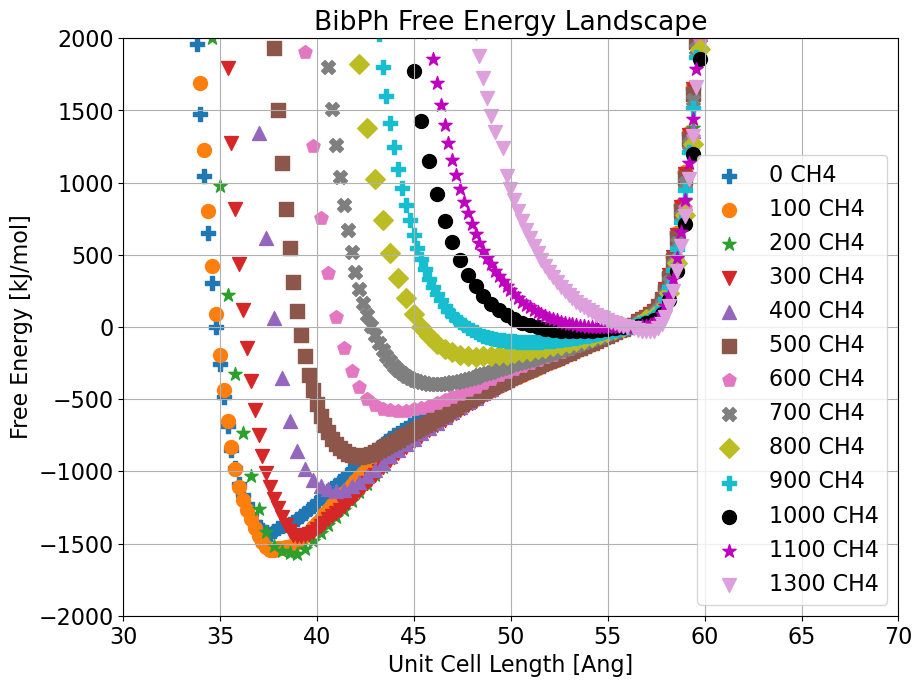

In [8]:
marker = itertools.cycle(('P', 'o', '*', 'v', '^', 's', 'p', 'X', 'D'))
plt.rcParams['lines.markersize'] = 10

df_0, free_eng_0 = get_FE_profile('pressures_bibPh_0mol.txt', 175000)
df_100, free_eng_100 = get_FE_profile('pressures_bibPh_100mol.txt', 175000)
df_200, free_eng_200 = get_FE_profile('pressures_bibPh_200mol.txt', 175000)
df_300, free_eng_300 = get_FE_profile('pressures_bibPh_300mol.txt', 175000)
df_400, free_eng_400 = get_FE_profile('pressures_bibPh_400mol.txt', 175000)
df_500, free_eng_500 = get_FE_profile('pressures_bibPh_500mol.txt', 175000)
df_600, free_eng_600 = get_FE_profile('pressures_bibPh_600mol.txt', 175000)
df_700, free_eng_700 = get_FE_profile('pressures_bibPh_700mol.txt', 175000)
df_800, free_eng_800 = get_FE_profile('pressures_bibPh_800mol.txt', 175000)
df_900, free_eng_900 = get_FE_profile('pressures_bibPh_900mol.txt', 175000)
df_1000, free_eng_1000 = get_FE_profile('pressures_bibPh_1000mol.txt', 175000)
df_1100, free_eng_1100 = get_FE_profile('pressures_bibPh_1100mol.txt', 175000)
#df_1200, free_eng_1200 = get_FE_profile('bibPh_FreeEnergy_1200.txt', 175000)
df_1300, free_eng_1300 = get_FE_profile('pressures_bibPh_1300mol.txt', 175000)
#df_1400, free_eng_1400 = get_FE_profile('bibPh_FreeEnergy_1400.txt', 175000)

""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
plt.set_cmap('tab10')
n = 1/3
plt.scatter((df_0['Volume']*1e30)**n, free_eng_0, label='0 CH4', marker=next(marker))
plt.scatter((df_100['Volume']*1e30)**n, free_eng_100, label='100 CH4', marker=next(marker))
plt.scatter((df_200['Volume']*1e30)**n, free_eng_200, label='200 CH4', marker=next(marker))
plt.scatter((df_300['Volume']*1e30)**n, free_eng_300, label='300 CH4', marker=next(marker))
plt.scatter((df_400['Volume']*1e30)**n, free_eng_400, label='400 CH4', marker=next(marker))
plt.scatter((df_500['Volume']*1e30)**n, free_eng_500, label='500 CH4', marker=next(marker))
plt.scatter((df_600['Volume']*1e30)**n, free_eng_600, label='600 CH4', marker=next(marker))
plt.scatter((df_700['Volume']*1e30)**n, free_eng_700, label='700 CH4', marker=next(marker))
plt.scatter((df_800['Volume']*1e30)**n, free_eng_800, label='800 CH4', marker=next(marker))
plt.scatter((df_900['Volume']*1e30)**n, free_eng_900, label='900 CH4', marker=next(marker))
plt.scatter((df_1000['Volume']*1e30)**n, free_eng_1000, c='k', label='1000 CH4', marker=next(marker))
plt.scatter((df_1100['Volume']*1e30)**n, free_eng_1100, c='m', label='1100 CH4', marker=next(marker))
#plt.scatter(df_1200['Volume']*1e30, free_eng_1200, label='1200 CH4')
plt.scatter((df_1300['Volume']*1e30)**n, free_eng_1300, c='plum', label='1300 CH4', marker=next(marker))
#plt.scatter(df_1400['Volume']*1e30, free_eng_1400, label='1400 CH4')
#plt.plot(np.array([176000, 176000])**n, [-2000,2000], 'r--', label='Start Point')
plt.xlabel('Unit Cell Length [Ang]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-2000,2000)); plt.xlim((30,70))
plt.legend(loc='lower right')
plt.title('BibPh Free Energy Landscape')
plt.savefig('BibPh_FE_Landscape_t2.png', dpi=400)
plt.show()

In [8]:
for i in range(len(free_eng_1300)):
    print((df_1300['Volume'].iloc[i]*1e30)**(1/3), free_eng_1300[i])

35.57791627882604 432503.5927035913
35.77791752199773 432503.5927035913
35.97791907239986 397654.22374396725
36.17792041028574 365508.5221042498
36.37792179425066 335822.1391823363
36.57792322254704 308485.5159311056
36.97792596166158 283331.50598484545
37.17792727450485 238668.40363992564
37.37792863036852 218975.17806742745
37.5779297916044 200817.9611804096
38.377934869457206 184140.8437628105
38.77793742520464 129267.16937446373
38.97793865142988 108228.6100776483
39.17793969958039 99048.55806919711
39.37794100481424 90619.28831222793
39.57794213359502 82867.36159470247
39.77794330170039 75745.34225689317
39.977944507783405 69204.43217190687
40.17794554404688 63214.16944879171
40.57794773372441 57729.62039436237
40.77794888454664 48152.20234774635
40.97795007102883 44019.32820613473
41.17795109538691 40237.75207881874
41.37795215683368 36746.899861694255
41.57795325415906 33552.629455827875
41.77795438618901 30654.74957567535
41.97795536262136 28009.82630981633
42.17795637509308 25

(181,)
(181,)
181
92
12
(8, 181)


TypeError: Length of y (12) must match number of rows in z (8)

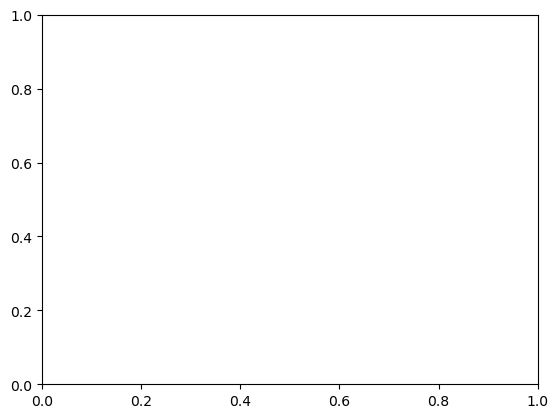

In [17]:
df_0, free_eng_0 = get_FE_profile('pressures_bibPh_0mol.txt', 175000, fillna_bool=True)
df_100, free_eng_100 = get_FE_profile('pressures_bibPh_100mol.txt', 175000, fillna_bool=True)
df_200, free_eng_200 = get_FE_profile('pressures_bibPh_200mol.txt', 175000, fillna_bool=True)
df_300, free_eng_300 = get_FE_profile('pressures_bibPh_300mol.txt', 175000, fillna_bool=True)
df_400, free_eng_400 = get_FE_profile('pressures_bibPh_400mol.txt', 175000, fillna_bool=True)
df_500, free_eng_500 = get_FE_profile('pressures_bibPh_500mol.txt', 175000, fillna_bool=True)
df_600, free_eng_600 = get_FE_profile('pressures_bibPh_600mol.txt', 175000, fillna_bool=True)
df_700, free_eng_700 = get_FE_profile('pressures_bibPh_700mol.txt', 175000, fillna_bool=True)
df_800, free_eng_800 = get_FE_profile('pressures_bibPh_800mol.txt', 175000, fillna_bool=True)
df_900, free_eng_900 = get_FE_profile('pressures_bibPh_900mol.txt', 175000, fillna_bool=True)
df_1000, free_eng_1000 = get_FE_profile('pressures_bibPh_1000mol.txt', 175000, fillna_bool=True)
df_1100, free_eng_1100 = get_FE_profile('pressures_bibPh_1100mol.txt', 175000, fillna_bool=True)
df_1300, free_eng_1300 = get_FE_profile('pressures_bibPh_1300mol.txt', 175000, fillna_bool=True)

#Contour Plot
loading_array = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200, 1400])
vol_0 = (df_0['Volume']).array*1e30
vol_100 = (df_100['Volume']).array*1e30
vol_200 = (df_200['Volume']).array*1e30
vol_300 = (df_300['Volume']).array*1e30
vol_400 = (df_400['Volume']).array*1e30
vol_500 = (df_500['Volume']).array*1e30
vol_600 = (df_600['Volume']).array*1e30
vol_700 = (df_700['Volume']).array*1e30
vol_800 = (df_800['Volume']).array*1e30
vol_900 = (df_900['Volume']).array*1e30
vol_1000 = (df_1000['Volume']).array*1e30
vol_1100 = (df_1100['Volume']).array*1e30
vol_1300 = (df_1300['Volume']).array*1e30

full_vol_array = np.concatenate((vol_0, vol_100, vol_300, vol_500, vol_700, vol_900, vol_1100, vol_1300))

print(free_eng_0.shape)
print(free_eng_1300.shape)
full_eng_array = np.array([free_eng_0, free_eng_100, free_eng_300, free_eng_500, free_eng_700,
                           free_eng_900, free_eng_1100, free_eng_1300])

print(len(vol_0))
print(len(vol_1000))
print(len(loading_array))
print(full_eng_array.shape)

plt.contourf(vol_0.tolist(), loading_array.tolist(), full_eng_array, vmin=-2000, vmax=2000, cmap='viridis', levels=np.linspace(-2000,2000,21))
cbar = plt.colorbar(extend='both')
plt.clim(vmin=-2000, vmax=2000)

plt.title('Free Energy Profile bibPh')
plt.xlabel('Volume [A^3]'); plt.ylabel('Loading')
plt.show()